In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [ ]:
Transform=transforms.Compose([
    transforms.Resize((96,96)),                                          # downscaling images
    transforms.ToTensor(),                                          # converting them to tensors
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

In [ ]:
train_data=ImageFolder(root='/content/drive/MyDrive/cats-vs-dogs/Train',transform=Transform)      #applying transformation and converting to tensors
train_data[0]

(tensor([[[ 0.6078,  0.6471,  0.6784,  ...,  0.9373,  0.9294,  0.8980],
          [ 0.6078,  0.6471,  0.6784,  ...,  0.9373,  0.9294,  0.9059],
          [ 0.6078,  0.6471,  0.6784,  ...,  0.9373,  0.9216,  0.9137],
          ...,
          [ 0.2549,  0.2627,  0.2863,  ..., -0.9765, -0.9765, -0.9843],
          [ 0.2314,  0.2392,  0.2627,  ..., -0.9765, -0.9765, -0.9843],
          [ 0.2000,  0.2235,  0.2471,  ..., -0.9843, -0.9843, -0.9843]],
 
         [[ 0.3020,  0.3412,  0.3725,  ...,  0.6471,  0.6157,  0.5922],
          [ 0.3020,  0.3412,  0.3725,  ...,  0.6627,  0.6314,  0.6000],
          [ 0.3020,  0.3412,  0.3647,  ...,  0.6784,  0.6471,  0.6078],
          ...,
          [-0.0118, -0.0039,  0.0196,  ..., -0.9686, -0.9686, -0.9765],
          [-0.0275, -0.0118,  0.0039,  ..., -0.9765, -0.9765, -0.9765],
          [-0.0431, -0.0196,  0.0039,  ..., -0.9843, -0.9843, -0.9843]],
 
         [[-0.3020, -0.2627, -0.2314,  ...,  0.0118, -0.0275, -0.0431],
          [-0.3020, -0.2627,

In [ ]:
test_data=ImageFolder(root='/content/drive/MyDrive/cats-vs-dogs/Test',transform=Transform)    #applying transformation and converting to tensors
test_data[0]

(tensor([[[-0.7647, -0.7725, -0.6863,  ...,  0.0196,  0.0196,  0.0039],
          [-0.6706, -0.6549, -0.6314,  ...,  0.0196,  0.0353,  0.0196],
          [-0.6314, -0.6314, -0.6157,  ...,  0.0353,  0.0510,  0.0353],
          ...,
          [ 0.3569,  0.3255,  0.2941,  ...,  0.4902,  0.5137,  0.4275],
          [ 0.3961,  0.3333,  0.2941,  ...,  0.4824,  0.5059,  0.4118],
          [ 0.2706,  0.2000,  0.1765,  ...,  0.4902,  0.4980,  0.3882]],
 
         [[-0.7255, -0.7333, -0.6549,  ...,  0.2627,  0.2784,  0.2549],
          [-0.5922, -0.5843, -0.5686,  ...,  0.2627,  0.2941,  0.2784],
          [-0.5294, -0.5373, -0.5294,  ...,  0.2784,  0.3098,  0.2941],
          ...,
          [ 0.2471,  0.2157,  0.1765,  ...,  0.4824,  0.5137,  0.3961],
          [ 0.2941,  0.2314,  0.1843,  ...,  0.4745,  0.4980,  0.3725],
          [ 0.1608,  0.0980,  0.0745,  ...,  0.4745,  0.4902,  0.3490]],
 
         [[-0.6549, -0.6392, -0.5373,  ...,  0.2235,  0.2549,  0.2314],
          [-0.5686, -0.5216,

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

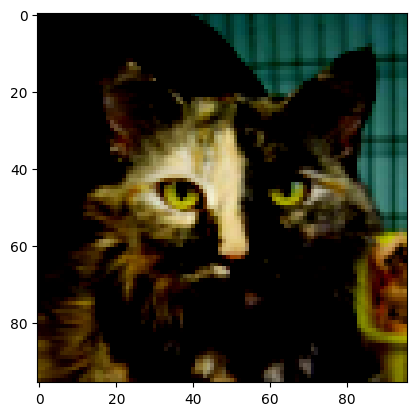

In [ ]:
def show_image(img):
  plt.imshow(img.permute(1,2,0))                               # plotting the image

img , label=test_data[0]
show_image(img)

In [ ]:
len(train_data)


20038

In [ ]:
len(test_data)

5000

In [ ]:
train_dl=DataLoader(train_data,batch_size=256,shuffle=True,num_workers=4,pin_memory=True)             # dividing train_data into series of mini batches
test_dl=DataLoader(test_data,batch_size=256,shuffle=True,num_workers=4,pin_memory=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
from re import L
class CNN(nn.Module):                                                                      # CNN architecture
  def __init__(self,input_shape=(3,96,96)):
    super(CNN,self).__init__()

    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1)

    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)

    self.leaky=nn.LeakyReLU(0.2)
    self.sigmoid=nn.Sigmoid()
    with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output = self._forward_conv(dummy_input)
            flattened_size = dummy_output.view(1, -1).size(1)

    self.layer1=nn.Linear(flattened_size,48)
    self.layer2=nn.Linear(48,48)
    self.layer3=nn.Linear(48,48)
    self.layer4=nn.Linear(48,1)

  def _forward_conv(self,x):
    x=self.pool(self.leaky(self.conv1(x)))
    x=self.pool(self.leaky(self.conv2(x)))
    x=self.pool(self.leaky(self.conv3(x)))
    return x

  def forward(self,x):
    x=self._forward_conv(x)
    x=torch.flatten(x,1)
    x=self.leaky(self.layer1(x))
    x=self.leaky(self.layer2(x))
    x=self.leaky(self.layer3(x))
    x=self.sigmoid(self.layer4(x))

    return x


model=CNN()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Ensure you're using the GPU
model = model.to(device)  # Move model to GPU


In [ ]:


if torch.cuda.is_available():
  print("GPU is available!")
  print(torch.cuda.get_device_name(0))  # Prints the name of the GPU
else:
  print("GPU is not available.")

GPU is available!
Tesla T4


In [ ]:
import torch.nn.functional as F
opt=torch.optim.Adam(model.parameters(),lr=1e-3)            # Adam optimiser
loss_fn=F.binary_cross_entropy                      # loss function for binary classification

In [ ]:
print(next(model.parameters()).device)

cuda:0


In [ ]:
def train(model, opt, loss_fn, train_dl, epoch):
    for e in range(epoch):                                              # Training the model
        model.train()
        total_loss = 0
        for img, label in train_dl:
            img, label = img.to(device), label.to(device)  # Move data to GPU
            img, label = img.to(torch.float32), label.to(torch.float32)  # Ensure float labels

            opt.zero_grad()
            output = model(img).view(-1)  # Flatten output to match label shape
            loss = loss_fn(output, label)
            loss.backward()
            opt.step()

            total_loss += loss.item()

            print(f'Epoch {e+1}/{epoch}, Train Loss per batch: {total_loss/len(train_dl):.4f}')

train(model,opt,loss_fn,train_dl,35)

Streaming output truncated to the last 5000 lines.
Epoch 4/35, Train Loss per batch: 0.0574
Epoch 4/35, Train Loss per batch: 0.0599
Epoch 4/35, Train Loss per batch: 0.0625
Epoch 4/35, Train Loss per batch: 0.0650
Epoch 4/35, Train Loss per batch: 0.0673
Epoch 4/35, Train Loss per batch: 0.0692
Epoch 4/35, Train Loss per batch: 0.0721
Epoch 4/35, Train Loss per batch: 0.0742
Epoch 4/35, Train Loss per batch: 0.0763
Epoch 4/35, Train Loss per batch: 0.0790
Epoch 4/35, Train Loss per batch: 0.0814
Epoch 4/35, Train Loss per batch: 0.0835
Epoch 4/35, Train Loss per batch: 0.0852
Epoch 4/35, Train Loss per batch: 0.0878
Epoch 4/35, Train Loss per batch: 0.0904
Epoch 4/35, Train Loss per batch: 0.0928
Epoch 4/35, Train Loss per batch: 0.0947
Epoch 4/35, Train Loss per batch: 0.0975
Epoch 4/35, Train Loss per batch: 0.0995
Epoch 4/35, Train Loss per batch: 0.1017
Epoch 4/35, Train Loss per batch: 0.1045
Epoch 4/35, Train Loss per batch: 0.1069
Epoch 4/35, Train Loss per batch: 0.1092
Epoch 

In [ ]:
print("hello")

hello


In [ ]:
torch.save(model.state_dict(), 'cnn_model.pth')

In [ ]:
print(len(test_dl))

20


In [ ]:
def test_model(model , loss_fn , test_dl):                 # Testing the model
  device = next(model.parameters()).device
  model.eval()                                    # model in evaluation mode
  with torch.no_grad():                      # disabling gradient computation
    total_loss=0
    correct=0
    for imgs,labels in test_dl:
      imgs, labels = imgs.to(device), labels.to(device)  # Move inputs to the same device as the model
      imgs, labels = imgs.to(torch.float32), labels.to(torch.float32)
      output=model(imgs).view(-1)
      loss=loss_fn(output,labels)
      total_loss+=loss.item()
      pred=torch.round(output)
      correct+=(pred==labels).sum().item()
    print(f'Test Loss per batch: {total_loss/len(test_dl):.4f}')
    return correct

c=test_model(model,loss_fn,test_dl)
print("Accuracy is: ",c*100/(len(test_dl)*256))

Test Loss per batch: 1.9112
Accuracy is:  80.546875
